In [1]:
from notebook.services.config import ConfigManager
ConfigManager().update('livereveal', {
              'width': 1600,
              'height': 900,
             'theme': 'sky2'
})
from IPython.display import YouTubeVideo

In [2]:
%pylab inline
figsize(15,10);

Populating the interactive namespace from numpy and matplotlib


# 用神經網路玩 2048



### 2016/09/05 tjw at MLDM Monday




From wikipedia:
<img alt="2048 promo art.png" src="//upload.wikimedia.org/wikipedia/commons/f/f0/2048_promo_art.png" data-file-width="300" data-file-height="300" height="300" width="300"></a>
<div>

* Developer(s): Gabriele Cirulli
* Initial release: 9 March 2014
* Platform: 	Web, Mobile phones, Nintendo 3DS
* Type: 	Puzzle
* License: 	MIT license
* Website: 	gabrielecirulli.github.io/2048/

## Google or Github: Deep Learning 2048 
## 有很多結果

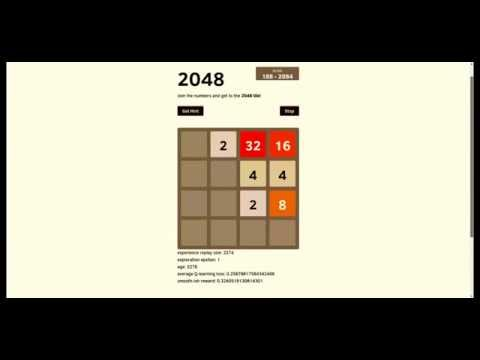

In [2]:
YouTubeVideo('OKTD_VedHdA')

<div class='zoom_img' style="width: 100%">

<img src='snapshot1.png' />
</div>

# https://github.com/tjwei/2048-NN

In [5]:
IFrame("https://tjwei.github.io/2048-NN", "90%", 800)

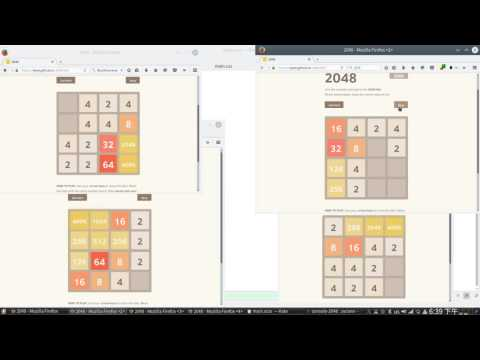

In [6]:
YouTubeVideo('oRC2W38lxIE')

<img src="https://github.com/tjwei/2048-NN/blob/master/plot1.png?raw=true" width="80%" />

## Short story

<div class='zoom_img' style="width: 100%">

<img src='snapshot2.png' />
</div>

# Learning is all about generalization
> All generalizations are false, including this one.



> --Mark Twain

# 為什麼 2048 不適合用 NN

* 怎麼編碼 input
* 邏輯太複雜
* 用搜尋的方法更好

# 為什麼 2048 適合用 NN

In [8]:
from lasagne.layers import *
from lasagne.nonlinearities import *
import lavis
def draw(l, output_shape=False, rankdir="TB"):
    return lavis.draw_to_notebook(get_all_layers(l), output_shape=output_shape, rankdir=rankdir)
def draw_to_file(name, l, output_shape=False, rankdir="TB"):
    dot = lavis.get_pydot_graph(get_all_layers(l), output_shape=output_shape, rankdir=rankdir)
    dot.write_svg(name+".svg")

### Version 1

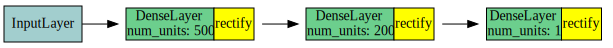

In [12]:
_ = InputLayer(shape=(None, 4, 4, 16))
_ = DenseLayer(_, num_units=500, nonlinearity=rectify)
_ = DenseLayer(_, num_units=200, nonlinearity=rectify)
l_out = DenseLayer(_, num_units=1, nonlinearity=rectify)
draw(l_out, rankdir="LR")

* Self play
* 盤面 : 分數
* 策略: 四個方向走走看，選分數最高的
* 成果: 0%

### 問題在
* learning 的方式?
* Neural Network 的能力?

# Monte-Carlo Player

* 用模擬 random play 來得到最好的 move
* 然後 self play
* 模擬的數量 5, 10, 20, 50, 100 

## MC100
* 1024+: 98%
* 2048+:  83%
* 4096: 19%

效能方面：
* 用  Cython 改寫原來的 2048 python module
* Embarrassingly parallel
* ipyparallel （notebook中測試時）

# Supervised learning

* Monte Carlo play 來得到最好的 move
* 模擬的數量 5, 10, 20, 50, 100 
* 盤面 : move 
* 盤面: 分數， 效果較差

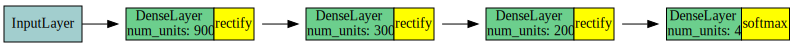

In [17]:
_ = InputLayer(shape=(None, 4, 4, 16))
_ = DenseLayer(_, num_units=900, nonlinearity=rectify)
_ = DenseLayer(_, num_units=300, nonlinearity=rectify)
_ = DenseLayer(_, num_units=200, nonlinearity=rectify)
l_out = DenseLayer(_, num_units=4, nonlinearity=softmax)
draw(l_out, rankdir="LR")

* 預測正確率： < 50%
* 1024+: 91%
* 2048+: 48%
* 4096: 1%
* 平均步數: 1200
* 盤面: 分數 步數 < 400

# The 10,000 Hour Rule
> “The master has failed more times than the beginner has even tried.”


> --Stephen McCranie

* 500 萬個盤面開始看出成效
* 需要 data augmentation

* 資料不夠好?
* 神經網路模型不夠好?

# You cannot learn from textbook
> “We learn from failure, not from success!” 



>  --Bram Stoker, Dracula 

## 愛就要給他最好的
* https://github.com/nneonneo/2048-ai
* AWS 開 36 個 thread 
* 跑出 26M 個盤面 (每局限制步數)

## 結果
* 1024+: 70%
* 2048+: 18%
* 4096+: 0%
* 平均步數：843


## Wider seems to be better

```python
_ = InputLayer(shape=(None, 4, 4, 16))
_ = dense(_, 2400)
_ = dense(_, 1600)
_ = dense(_, 800)
_ = dense(_, 400)
_ = dense(_, 400)
_ = dense(_, 200)
_ = dense(_, 200)
_ = dense(_, 100)
_ = dense(_,100)
l_out = DenseLayer(_, num_units=4, nonlinearity=softmax)
```

## with MC 100
* 1024+: 89%
* 2048+: 63%
* 4096: 3%
* 平均步數 1350
{128: 9, 256: 25, 4096: 37, 2048: 596, 1024: 259, 512: 74} 0.633

# Customized Supervised Learning
* self play
* tuning with 2048-ai or MC100

* 1024+: 98.5%
* 2048+: 94.2%
* 4096+: 78.5%
* 8192+: 34.7%
* 16384: not 0
* 平均步數: 3733
* 平均分數: 85351

<img src="https://github.com/tjwei/2048-NN/raw/master/plot2.png" width="80%" />

# Cleaner ways?

* self play
* top 10% games as good moves [1,0,0,0]
* bottom 30% as bad moves [0, 1/3, 1/3, 1/3]

# Thanks